<a href="https://colab.research.google.com/github/Marieke-do/Assignment---Income-inequality-in-relation-to-GDP/blob/main/Assignment_Income_inequality_in_relation_to_GDP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Is there a relation between a country's Gross Domestrict Product (GDP) and its income inequality?**

To be able to answer this question you would want to calculate the "correlation coefficient" of the GDP and the Gini coefficient.

https://nl.wikipedia.org/wiki/Gini-coëfficiënt:
De Gini-coëfficiënt, ook wel Gini-index, is een statistische maatstaf van de ongelijkheid in een verdeling. De Gini-coëfficiënt wordt met name gebruikt in de economie om de ongelijkheid in inkomen of vermogen aan te geven, maar is geschikt om elke vorm van ongelijkmatige verspreiding te meten.

De Gini-coëfficiënt is doorgaans een getal tussen nul en één en wordt soms uitgedrukt als percentage. De waarde nul correspondeert hierbij met volkomen gelijkheid (in het voorbeeld van de inkomensverdeling heeft iedereen hetzelfde inkomen) en één correspondeert met volkomen ongelijkheid (één persoon heeft al het inkomen en de rest heeft geen inkomen). Indien negatieve inkomens of vermogens (schulden) worden meegerekend, dan kan de Gini-coëfficiënt een waarde groter dan één aannemen.

In [76]:
import pandas as pd
import numpy as np
from scipy.stats import pearsonr
%load_ext google.colab.data_table

The google.colab.data_table extension is already loaded. To reload it, use:
  %reload_ext google.colab.data_table


In [77]:
df_gini = pd.read_csv('https://raw.githubusercontent.com/Marieke-do/Assignment---Income-inequality-in-relation-to-GDP/main/economic-inequality-gini-index.csv')
df_gini


Entity Code  Year  Gini index
0      Albania  ALB  1981    27.01034
1      Albania  ALB  1982    27.01034
2      Albania  ALB  1983    27.01034
3      Albania  ALB  1984    27.01034
4      Albania  ALB  1985    27.01034
...        ...  ...   ...         ...
4379  Zimbabwe  ZWE  2009    43.15358
4380  Zimbabwe  ZWE  2010    43.15358
4381  Zimbabwe  ZWE  2011    43.15358
4382  Zimbabwe  ZWE  2017    44.33708
4383  Zimbabwe  ZWE  2019    50.25645

[4384 rows x 4 columns]

In [78]:
df_gdp = pd.read_csv('https://raw.githubusercontent.com/Marieke-do/Assignment---Income-inequality-in-relation-to-GDP/main/gdp-per-capita-maddison-2020.csv')
df_gdp

Entity Code  Year  GDP per capita 145446-annotations
0      Afghanistan  AFG  1950         1156.00                NaN
1      Afghanistan  AFG  1951         1170.00                NaN
2      Afghanistan  AFG  1952         1189.00                NaN
3      Afghanistan  AFG  1953         1240.00                NaN
4      Afghanistan  AFG  1954         1245.00                NaN
...            ...  ...   ...             ...                ...
19873     Zimbabwe  ZWE  2014         1594.00                NaN
19874     Zimbabwe  ZWE  2015         1560.00                NaN
19875     Zimbabwe  ZWE  2016         1534.00                NaN
19876     Zimbabwe  ZWE  2017         1582.37                NaN
19877     Zimbabwe  ZWE  2018         1611.41                NaN

[19878 rows x 5 columns]

The Gini index is available for several countries from 1981 - 2019.

The GDP is available for more countries than the Gini index and also for a longer time period, until 2018.

To be able to calculate the correlation between the Gini index and the GDP, tables should be merged, based on the information that is available for both tables (country and year).

In [79]:
# First drop columns we don't need 
df_gini.drop(columns = 'Code', inplace = True)
df_gdp.drop(columns = ['Code', '145446-annotations'], inplace = True)
display(df_gini)

Entity  Year  Gini index
0      Albania  1981    27.01034
1      Albania  1982    27.01034
2      Albania  1983    27.01034
3      Albania  1984    27.01034
4      Albania  1985    27.01034
...        ...   ...         ...
4379  Zimbabwe  2009    43.15358
4380  Zimbabwe  2010    43.15358
4381  Zimbabwe  2011    43.15358
4382  Zimbabwe  2017    44.33708
4383  Zimbabwe  2019    50.25645

[4384 rows x 3 columns]

In [80]:
# Merge dataframes

df = pd.merge(df_gini, df_gdp)
display(df)

Entity  Year  Gini index  GDP per capita
0      Albania  1981    27.01034         3762.00
1      Albania  1982    27.01034         3783.00
2      Albania  1983    27.01034         3805.00
3      Albania  1984    27.01034         3826.00
4      Albania  1985    27.01034         3846.00
...        ...   ...         ...             ...
3567  Zimbabwe  2008    43.15358         1197.53
3568  Zimbabwe  2009    43.15358         1285.05
3569  Zimbabwe  2010    43.15358         1401.86
3570  Zimbabwe  2011    43.15358         1515.00
3571  Zimbabwe  2017    44.33708         1582.37

[3572 rows x 4 columns]

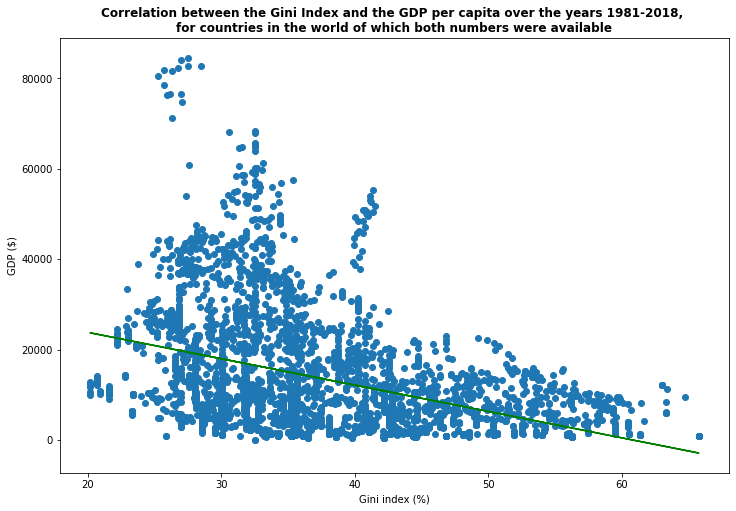

In [81]:
# make scatterplot from all data with linear regression line

import matplotlib.pyplot as plt
from numpy.polynomial.polynomial import polyfit

%matplotlib inline

fig, ax = plt.subplots()

ax.scatter(df['Gini index'], df['GDP per capita'])
plt.xlabel('Gini index (%)')
plt.ylabel('GDP ($)')
plt.title('Correlation between the Gini Index and the GDP per capita over the years 1981-2018, \nfor countries in the world of which both numbers were available', fontweight = 'bold')

b, m = polyfit(df['Gini index'], df['GDP per capita'], 1)
plt.plot(df['Gini index'], b + m * df['Gini index'], '-', color='green')

fig.set_size_inches(12,8)
plt.show()

In [82]:
# calculate Pearson correlation based on all the data from all countries

pearson_corr = pearsonr(df['Gini index'], df['GDP per capita'])
pearson_corr

(-0.4108942493442808, 1.4250793273026632e-145)

There is a low to moderate correlation of -0.41 between the Gini Index and the GDP of a country over the years 1981-2018. This means that the higher the GDP, the lower the Gini Index (e.g. the income inequality). This indicates that in general the richer a country is, the more equal income is.
However, this could fluctuate over the years and differences per country could exist as well.

The maximum correlation between 1981 and 2018 is -0.28315176673197584, the minumum correlation is -0.5184629631489632


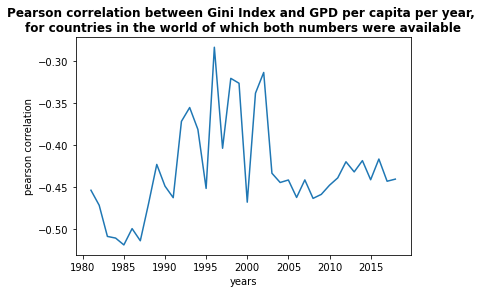

In [125]:
# group data per year, to see if the correlation has changed over the years

list_of_yrs = df['Year'].unique().tolist()
list_of_yrs.sort()
# print(list_of_yrs)

df_per_yr = df.groupby(['Year'])

def get_correlation(year):

  corr_year = df_per_yr.get_group(year).corr().iloc[1,2]
  return corr_year

corr_per_yr_list = [get_correlation(year) for year in list_of_yrs]
# print(corr_per_yr_list)

df_corr_year = pd.DataFrame(list(zip(list_of_yrs, corr_per_yr_list )), columns = ['year', 'pearson correlation'])

df_corr_year

max = df_corr_year['pearson correlation'].max()
min = df_corr_year['pearson correlation'].min()

print(f'The maximum correlation between 1981 and 2018 is {max}, the minumum correlation is {min}' )

fig, ax = plt.subplots()

ax.plot(df_corr_year['year'], df_corr_year['pearson correlation'])
plt.xlabel('years')
plt.ylabel('pearson correlation')
plt.title('Pearson correlation between Gini Index and GPD per capita per year, \nfor countries in the world of which both numbers were available', fontweight = 'bold' )
plt.show()

There seems to be some fluctation over the years, however, the correlation is always negative and fluctuates between -0.52 and -0.28. 

['Albania', 'Algeria', 'Angola', 'Armenia', 'Australia', 'Austria', 'Azerbaijan', 'Bangladesh', 'Belarus', 'Belgium', 'Benin', 'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil', 'Bulgaria', 'Burkina Faso', 'Burundi', 'Cameroon', 'Canada', 'Cape Verde', 'Central African Republic', 'Chad', 'Chile', 'Colombia', 'Comoros', 'Congo', 'Costa Rica', "Cote d'Ivoire", 'Croatia', 'Cyprus', 'Czechia', 'Democratic Republic of Congo', 'Denmark', 'Djibouti', 'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador', 'Estonia', 'Eswatini', 'Ethiopia', 'Finland', 'France', 'Gabon', 'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece', 'Guatemala', 'Guinea', 'Guinea-Bissau', 'Haiti', 'Honduras', 'Hungary', 'Iceland', 'Iran', 'Iraq', 'Ireland', 'Israel', 'Italy', 'Jamaica', 'Japan', 'Jordan', 'Kazakhstan', 'Kenya', 'Kyrgyzstan', 'Laos', 'Latvia', 'Lebanon', 'Lesotho', 'Liberia', 'Lithuania', 'Luxembourg', 'Madagascar', 'Malawi', 'Malaysia', 'Mali', 'Malta', 'Mauritania', 'Mauritius', 'Mexico', 'Moldov

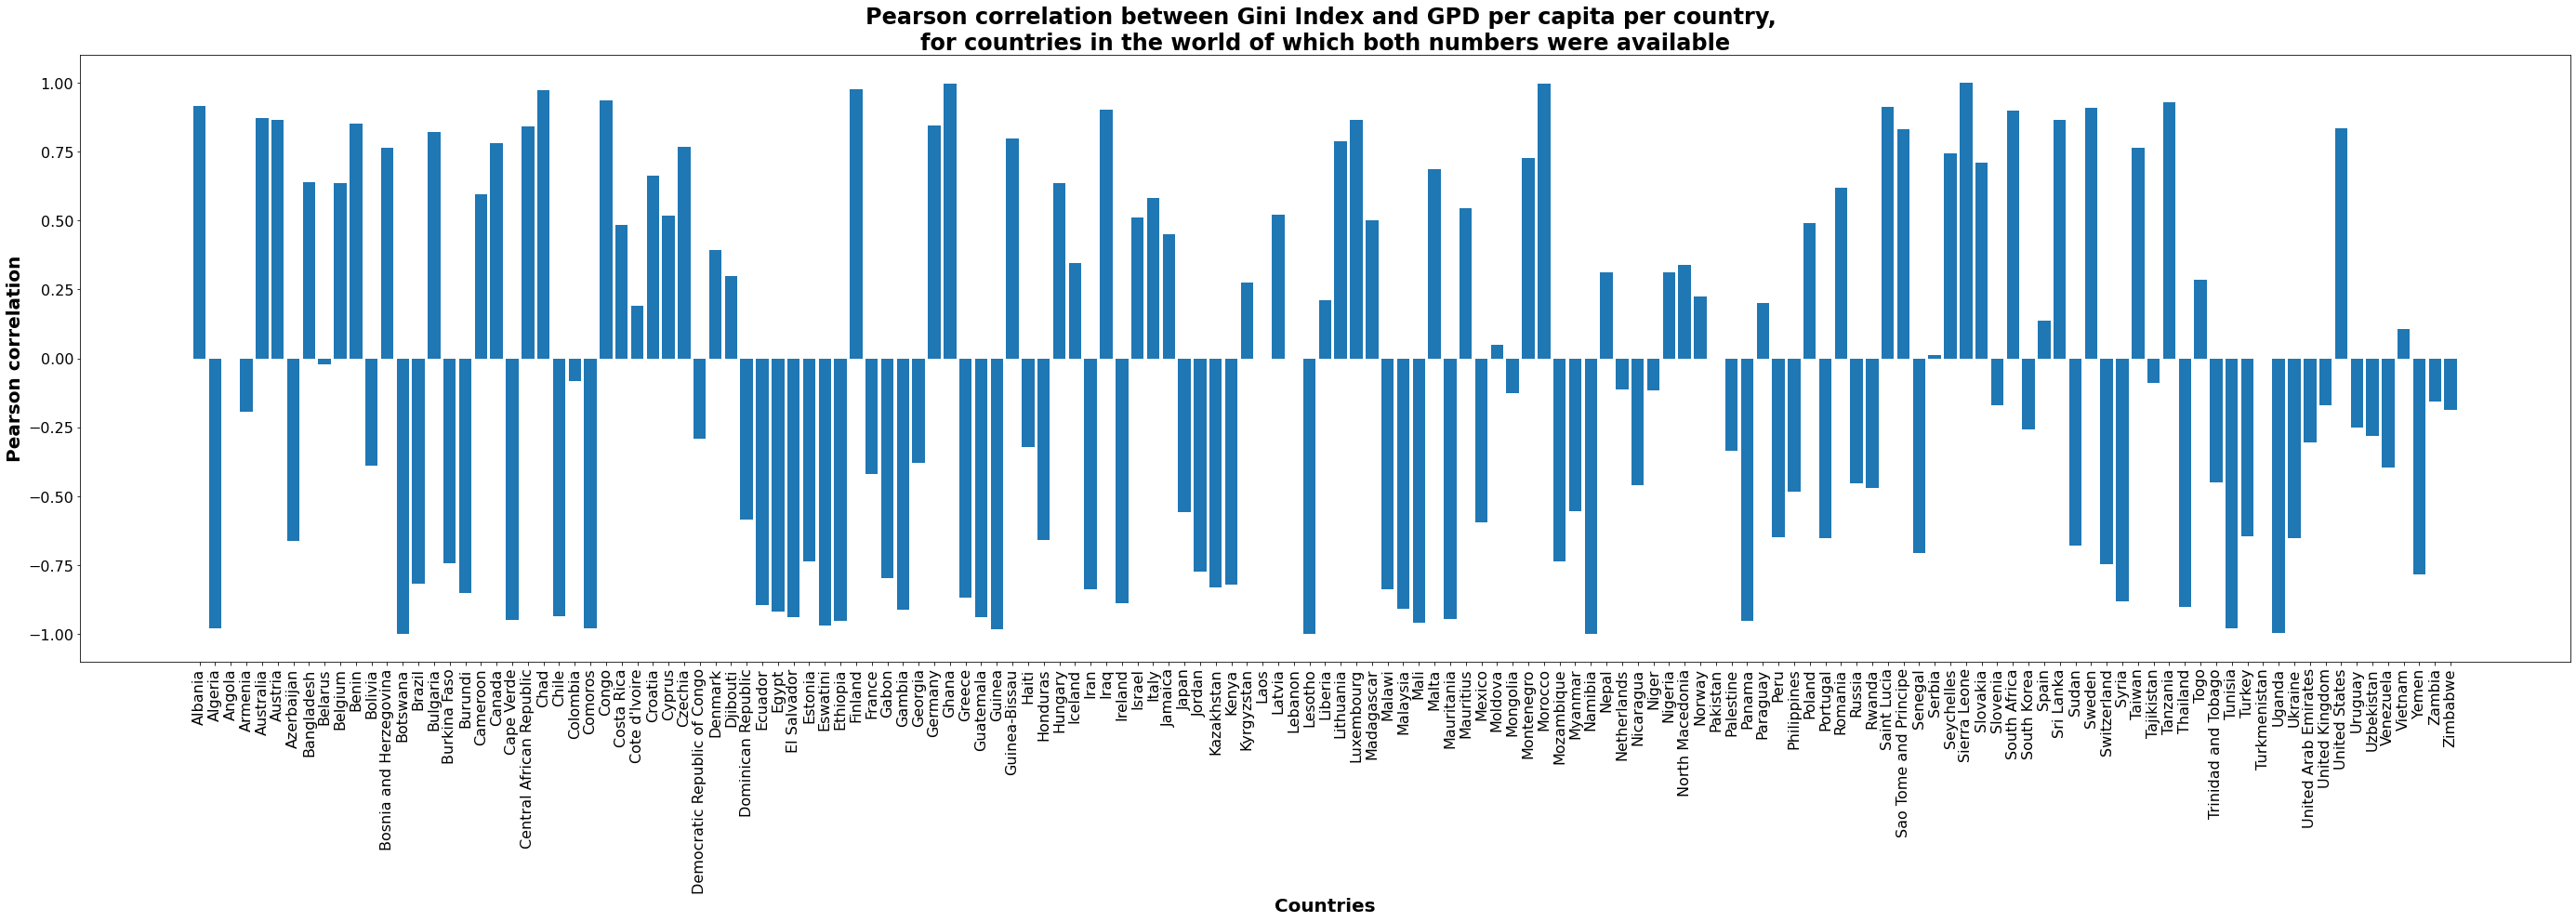

In [123]:
# group data per country, to see if correlation differs per country

list_of_countries = df['Entity'].unique().tolist()
list_of_countries.sort()
print(list_of_countries)

df_per_country = df.groupby(['Entity'])

# corr_country_alb = df_per_country.get_group('Albania').corr()
# corr_country_alb

def get_correlation_country(country):

  corr_country = df_per_country.get_group(country).corr().iloc[1,2]
  return corr_country

corr_per_country_list = [get_correlation_country(country) for country in list_of_countries]
print(corr_per_country_list)

df_corr_country = pd.DataFrame(list(zip(list_of_countries, corr_per_country_list )), columns = ['country', 'pearson correlation'])

df_corr_country

fig, ax = plt.subplots()

ax.bar(df_corr_country['country'], df_corr_country['pearson correlation'])
plt.xlabel('Countries', fontweight = 'bold', fontsize = 20)
plt.ylabel('Pearson correlation', fontweight = 'bold', fontsize = 20)
plt.title('Pearson correlation between Gini Index and GPD per capita per country, \nfor countries in the world of which both numbers were available', fontweight = 'bold', fontsize = 24 )
fig.set_size_inches(48, 12)
plt.xticks(fontsize = 16, rotation = 90)
plt.yticks(fontsize = 16)

plt.show()

The plot above shows that there is a great difference in correlation between Gini Index and GDP per country. Some countries show a positive correlation and some countries show a negative correlation. Negative correlations seem to occur more often, so this explains why the overall correlation is negative.  